In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.style as style
#style.use('seaborn-poster') #sets the size of the charts


In [4]:
#total = pd.read_excel('Total_3Months_Updated.xlsx')

In [5]:

total = pd.read_excel('MTR_B2C-OCTOBER-2020.xlsx') # The month we need to get the Visualizations


In [6]:
total.drop(total.loc[:,'Cgst Rate':'Credit Note Date'].columns,axis=1,inplace=True)

In [7]:
total.drop(['Shipment Id', 'Hsn/sac', 'Product Tax Code','Bill From City','Bill From Country','Bill From Postal Code','Ship From City','Bill From State',
           'Ship From Country','Ship From Postal Code','Ship To Country','Shipment Item Id'],axis=1,inplace=True)

In [8]:
df = total # For heatmap calculatons

In [9]:
total.nunique()

Seller Gstin             5
Invoice Number         798
Invoice Date           798
Transaction Type         4
Order Id               787
Shipment Date          680
Order Date             756
Quantity                 4
Item Description        20
Asin                    19
Sku                     21
Ship From State          6
Ship To City           213
Ship To State           30
Ship To Postal Code    430
Invoice Amount          44
Tax Exclusive Gross     52
Total Tax Amount        52
dtype: int64

In [10]:
total.head(1)

,Seller Gstin,Invoice Number,Invoice Date,Transaction Type,Order Id,Shipment Date,Order Date,Quantity,Item Description,Asin,Sku,Ship From State,Ship To City,Ship To State,Ship To Postal Code,Invoice Amount,Tax Exclusive Gross,Total Tax Amount
0,07CJVPA2317N1ZW,IN-SDEE-65,2020-06-01 00:34:20,Shipment,404-9120829-1726700,2020-06-01 08:01:33,2020-06-01 00:28:42,1,Purifit Washing Machine Filter Protects from H...,B07TM3LRVB,201,Delhi,PUNE,MAHARASHTRA,411006,1185.0,1004.24,180.76


# Number of orders from Each State

## Change the Plot title to the Month you are analyzing

[Text(0, 0, 'KARNATAKA'),
 Text(0, 0, 'MAHARASHTRA'),
 Text(0, 0, 'TELANGANA'),
 Text(0, 0, 'UTTAR PRADESH'),
 Text(0, 0, 'WEST BENGAL'),
 Text(0, 0, 'TAMIL NADU'),
 Text(0, 0, 'ANDHRA PRADESH'),
 Text(0, 0, 'DELHI'),
 Text(0, 0, 'HARYANA'),
 Text(0, 0, 'GUJARAT'),
 Text(0, 0, 'KERALA'),
 Text(0, 0, 'RAJASTHAN'),
 Text(0, 0, 'ASSAM'),
 Text(0, 0, 'MADHYA PRADESH'),
 Text(0, 0, 'ODISHA'),
 Text(0, 0, 'TRIPURA'),
 Text(0, 0, 'BIHAR'),
 Text(0, 0, 'PUNJAB'),
 Text(0, 0, 'UTTARAKHAND'),
 Text(0, 0, 'HIMACHAL PRADESH'),
 Text(0, 0, 'PUDUCHERRY'),
 Text(0, 0, 'CHANDIGARH'),
 Text(0, 0, 'JAMMU   KASHMIR'),
 Text(0, 0, 'GOA'),
 Text(0, 0, 'NAGALAND'),
 Text(0, 0, 'MEGHALAYA')]

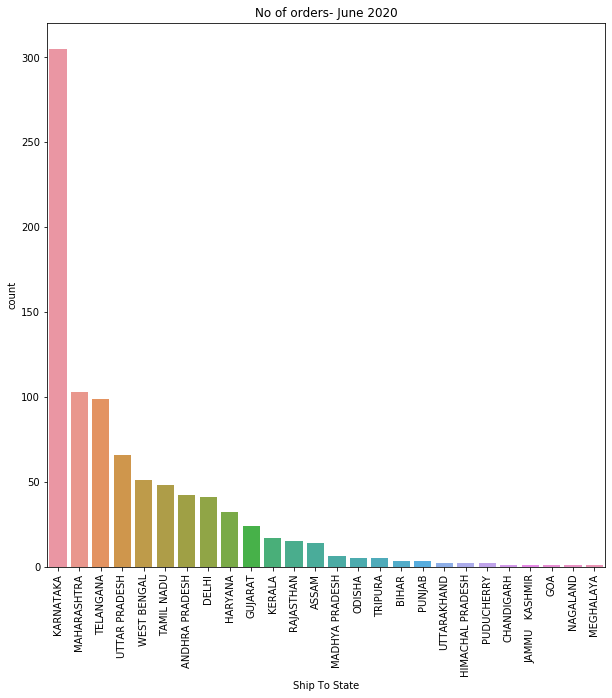

In [28]:
total['Ship To State'] = total['Ship To State'].str.upper() # Making every state lowercase to reduce reduntant states

plt.figure(figsize=(10, 10))
plt.title('No of orders- June 2020')
chart=sns.countplot(x='Ship To State',data=total, order = total['Ship To State'].value_counts().index )
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

# This is the Data where we have uppercased the states and then made image of.


# Total Revenue Per State

In [12]:
state_wise_revenue = total.groupby('Ship To State')['Invoice Amount'].sum().sort_values(ascending = False).reset_index()
state_wise_revenue

,Ship To State,Invoice Amount
0,KARNATAKA,303303.0
1,MAHARASHTRA,104102.0
2,TELANGANA,96998.0
3,UTTAR PRADESH,66554.0
4,DELHI,54340.0
5,TAMIL NADU,49479.0
6,ANDHRA PRADESH,43698.0
7,WEST BENGAL,42609.0
8,HARYANA,37615.0
9,KERALA,29409.0


[Text(0, 0, 'KARNATAKA'),
 Text(0, 0, 'MAHARASHTRA'),
 Text(0, 0, 'TELANGANA'),
 Text(0, 0, 'UTTAR PRADESH'),
 Text(0, 0, 'DELHI'),
 Text(0, 0, 'TAMIL NADU'),
 Text(0, 0, 'ANDHRA PRADESH'),
 Text(0, 0, 'WEST BENGAL'),
 Text(0, 0, 'HARYANA'),
 Text(0, 0, 'KERALA'),
 Text(0, 0, 'GUJARAT'),
 Text(0, 0, 'RAJASTHAN'),
 Text(0, 0, 'ASSAM'),
 Text(0, 0, 'MADHYA PRADESH'),
 Text(0, 0, 'TRIPURA'),
 Text(0, 0, 'PUNJAB'),
 Text(0, 0, 'UTTARAKHAND'),
 Text(0, 0, 'ODISHA'),
 Text(0, 0, 'CHANDIGARH'),
 Text(0, 0, 'BIHAR'),
 Text(0, 0, 'HIMACHAL PRADESH'),
 Text(0, 0, 'JAMMU   KASHMIR'),
 Text(0, 0, 'NAGALAND'),
 Text(0, 0, 'PUDUCHERRY'),
 Text(0, 0, 'GOA'),
 Text(0, 0, 'MEGHALAYA')]

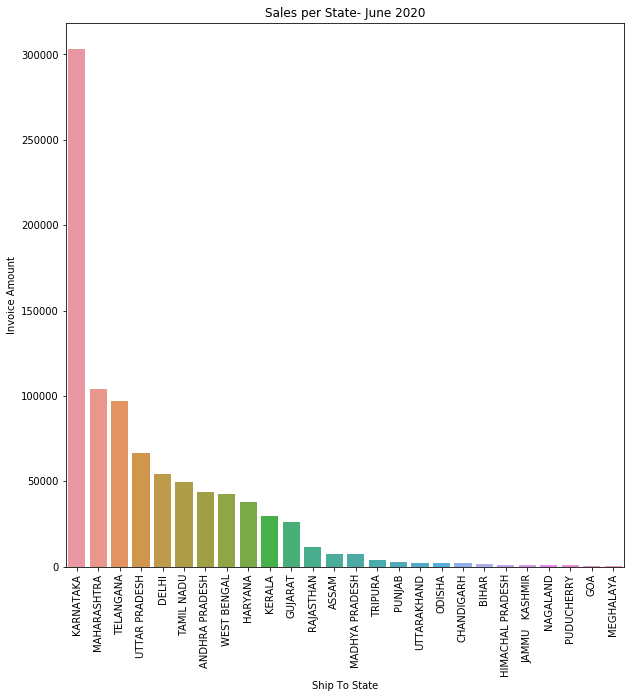

In [30]:

plt.figure(figsize=(10, 10))

plt.title('Sales per State- June 2020')
chart1 = sns.barplot(x='Ship To State', y ='Invoice Amount', data = state_wise_revenue)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)

# Total Revenue Per Product

In [33]:


product_wise_revenue = total.groupby('Sku')['Invoice Amount'].sum().sort_values(ascending = False)
product_wise_revenue

Sku
201                          337725.0
New 103                      250165.0
OK H0DX 9N0N                  82445.0
Car_Dash_Camera               62580.0
5A YB7Z ZFXP                  31995.0
New 103_1                     30582.0
104_Single                    25485.0
109                           22485.0
RW 0JGB G59A                  10978.0
New_901                       10693.0
901                            7595.0
106                            7095.0
105                            4792.0
109_Cartridge                  4792.0
New 103 A                      1995.0
New 104                        1891.0
601_wood                       1497.0
Washing_Machine_Filter         1395.0
401                            1349.0
107                            1250.0
Washing_Machine_Cartridge         0.0
Name: Invoice Amount, dtype: float64

[Text(0, 0, '201'),
 Text(0, 0, 'New 103'),
 Text(0, 0, 'OK H0DX 9N0N'),
 Text(0, 0, 'Car_Dash_Camera'),
 Text(0, 0, '5A YB7Z ZFXP'),
 Text(0, 0, 'New 103_1'),
 Text(0, 0, '104_Single'),
 Text(0, 0, '109'),
 Text(0, 0, 'RW 0JGB G59A'),
 Text(0, 0, 'New_901'),
 Text(0, 0, '901'),
 Text(0, 0, '106'),
 Text(0, 0, '105'),
 Text(0, 0, '109_Cartridge'),
 Text(0, 0, 'New 103 A'),
 Text(0, 0, 'New 104'),
 Text(0, 0, '601_wood'),
 Text(0, 0, 'Washing_Machine_Filter'),
 Text(0, 0, '401'),
 Text(0, 0, '107'),
 Text(0, 0, 'Washing_Machine_Cartridge')]

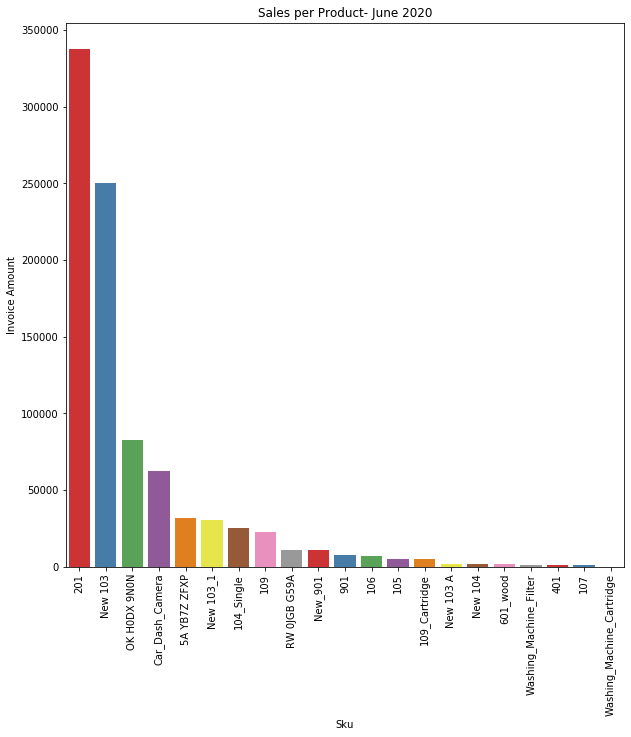

In [34]:
plt.figure(figsize=(10, 10))

plt.title('Sales per Product- June 2020')

chart2 = sns.barplot(x='Sku', y ='Invoice Amount', data = product_wise_revenue.reset_index(),palette= 'Set1')
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)

In [16]:
# Maximum Revenue From Which Warehouse, Witht out Tax

In [35]:
gst_wise_data = total.groupby('Seller Gstin')['Tax Exclusive Gross'].sum().sort_values(ascending=False)
gst_wise_data

Seller Gstin
29CJVPA2317N1ZQ    252019.05
32CJVPA2317N1Z3    205549.48
07CJVPA2317N1ZW    153234.15
27CJVPA2317N1ZU     94184.11
36CJVPA2317N1ZV     56655.20
Name: Tax Exclusive Gross, dtype: float64

[Text(0, 0, '29CJVPA2317N1ZQ'),
 Text(0, 0, '32CJVPA2317N1Z3'),
 Text(0, 0, '07CJVPA2317N1ZW'),
 Text(0, 0, '27CJVPA2317N1ZU'),
 Text(0, 0, '36CJVPA2317N1ZV')]

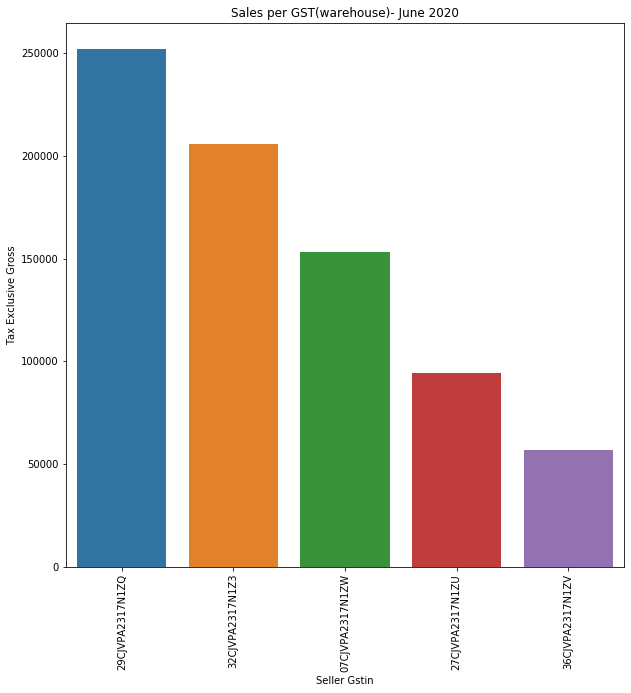

In [39]:
plt.figure(figsize=(10, 10))

plt.title('Sales per GST(warehouse)- June 2020')

chart4 = sns.barplot(x='Seller Gstin', y= 'Tax Exclusive Gross', data= gst_wise_data.reset_index())
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=90)

# Total Tax per GST Number

In [38]:

tax_per_gst = total.groupby('Seller Gstin')['Total Tax Amount'].sum().sort_values(ascending=False)
tax_per_gst

Seller Gstin
29CJVPA2317N1ZQ    45362.95
32CJVPA2317N1Z3    37046.52
07CJVPA2317N1ZW    27581.85
27CJVPA2317N1ZU    16952.89
36CJVPA2317N1ZV    10197.80
Name: Total Tax Amount, dtype: float64

# Total Revenue per Transaction Type

In [20]:

revenue_order_type= total.groupby('Transaction Type')['Invoice Amount'].sum()
revenue_order_type

Transaction Type
Cancel              0.0
MFNShipment    231727.0
Refund        -124657.0
Shipment       791714.0
Name: Invoice Amount, dtype: float64

#### This is How it looks after GroupBy()-Not exactly, as the inside data wil also expand

In [21]:
total.groupby('Transaction Type').count()

,Seller Gstin,Invoice Number,Invoice Date,Order Id,Shipment Date,Order Date,Quantity,Item Description,Asin,Sku,Ship From State,Ship To City,Ship To State,Ship To Postal Code,Invoice Amount,Tax Exclusive Gross,Total Tax Amount
Transaction Type,,,,,,,,,,,,,,,,,
Cancel,45,45,45,45,0,0,45,0,45,0,45,45,45,45,0,0,45
MFNShipment,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246,246
Refund,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
Shipment,509,509,509,509,509,509,509,509,509,509,509,509,509,509,509,509,509


# Highest Refunded Product

In [22]:
refund = total.groupby('Transaction Type').get_group('Refund')
refund.groupby('Sku')['Invoice Amount'].sum().sort_values()

Sku
201                         -37920.0
New 103                     -36705.0
109                         -11992.0
OK H0DX 9N0N                 -7495.0
Car_Dash_Camera              -6198.0
104_Single                   -5097.0
109_Cartridge                -4193.0
Washing_Machine_Filter       -2790.0
401                          -2698.0
New 104                      -2099.0
New 103_1                    -1699.0
New_901                      -1599.0
5A YB7Z ZFXP                 -1185.0
RW 0JGB G59A                  -998.0
105                           -599.0
106                           -516.0
Washing_Machine_Cartridge     -499.0
107                           -375.0
Name: Invoice Amount, dtype: float64

# Products From Different Order Types

In [23]:
order_type_with_sku = total.groupby(['Transaction Type','Sku'])
order_type_with_sku['Invoice Amount'].sum().sort_values()

Transaction Type  Sku                      
Refund            201                          -37920.0
                  New 103                      -36705.0
                  109                          -11992.0
                  OK H0DX 9N0N                  -7495.0
                  Car_Dash_Camera               -6198.0
                  104_Single                    -5097.0
                  109_Cartridge                 -4193.0
                  Washing_Machine_Filter        -2790.0
                  401                           -2698.0
                  New 104                       -2099.0
                  New 103_1                     -1699.0
                  New_901                       -1599.0
                  5A YB7Z ZFXP                  -1185.0
                  RW 0JGB G59A                   -998.0
                  105                            -599.0
                  106                            -516.0
                  Washing_Machine_Cartridge      -499.0
    

# Heat Map - On Purchase Time  (Df = Total)

In [24]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [25]:
df['Hour']= df['Order Date'].apply(lambda time: time.hour )

df['Date'] = df['Order Date'].apply(lambda time : time.date())

df['Day']= df['Order Date'].apply(lambda time: time.day )

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']= df['Order Date'].apply(lambda time: time.dayofweek )
df['Day of Week']= df['Day of Week'].map(dmap)

In [40]:
Day_Hour = df.groupby(['Day of Week','Hour']).count()['Order Id'].unstack()
Day_Hour.fillna(0,inplace =True)
Day_Hour

Hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,4.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,7.0,8.0,...,2.0,13.0,8.0,6.0,3.0,2.0,5.0,3.0,5.0,5.0
Mon,3.0,4.0,1.0,1.0,0.0,1.0,1.0,2.0,3.0,13.0,...,7.0,2.0,5.0,6.0,7.0,10.0,8.0,9.0,5.0,8.0
Sat,9.0,2.0,0.0,0.0,1.0,0.0,3.0,4.0,3.0,4.0,...,8.0,9.0,6.0,13.0,13.0,9.0,12.0,7.0,5.0,5.0
Sun,0.0,2.0,5.0,1.0,1.0,2.0,0.0,0.0,1.0,10.0,...,7.0,5.0,6.0,10.0,7.0,9.0,7.0,8.0,2.0,8.0
Thu,4.0,0.0,6.0,0.0,0.0,1.0,0.0,2.0,6.0,0.0,...,6.0,9.0,7.0,5.0,10.0,6.0,6.0,2.0,5.0,5.0
Tue,6.0,5.0,0.0,2.0,0.0,0.0,1.0,1.0,5.0,4.0,...,6.0,4.0,6.0,8.0,6.0,10.0,9.0,10.0,8.0,7.0
Wed,2.0,4.0,3.0,1.0,0.0,0.0,0.0,3.0,5.0,9.0,...,4.0,2.0,6.0,5.0,2.0,7.0,3.0,5.0,4.0,5.0


# Number of orders per Hour

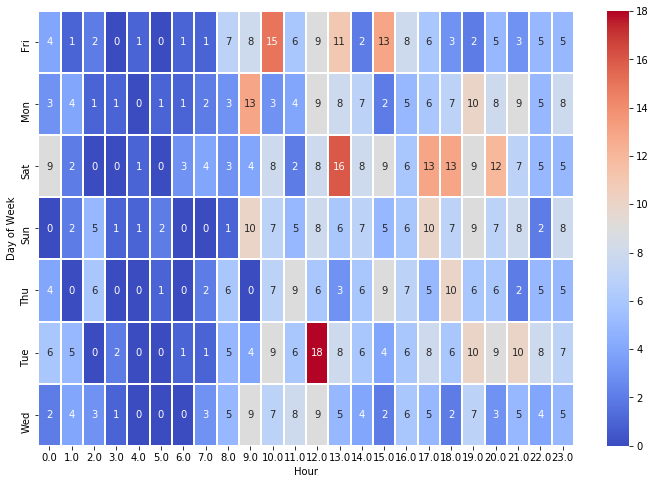

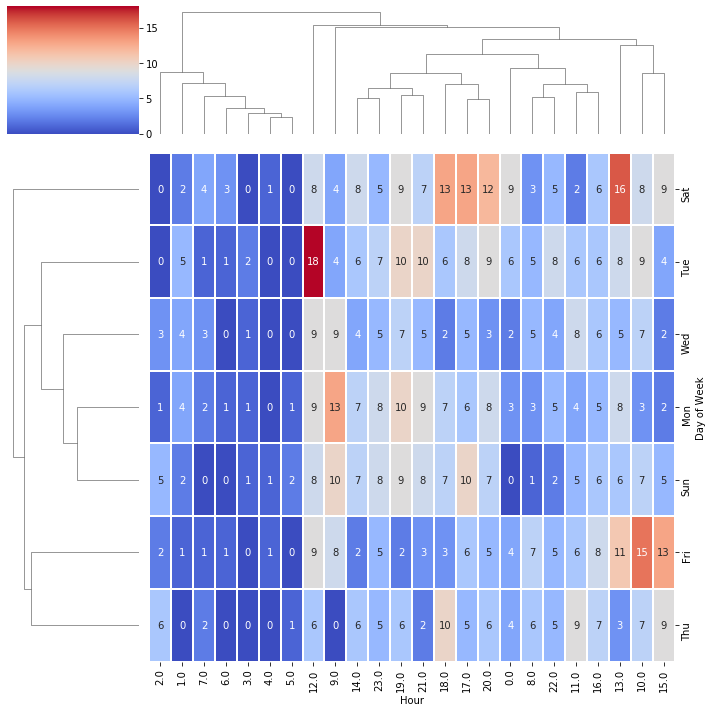

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(Day_Hour, cmap='coolwarm',linewidths=1,annot=True)
sns.clustermap(Day_Hour, cmap='coolwarm',linewidths=1,annot=True)
plt.tight_layout()